In [126]:
import numpy as np

#Parameters
input_size=3
out_size=2
layers=[4,3]

def softmax(a):
    e_pa=np.exp(a)
    ans = e_pa/np.sum(e_pa,keepdims=True)
    return ans

In [127]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        
        #First Layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        #Output Layer
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        self.activation_outputs= None
        
    def forward(self,x):
        W1,W2,W3= self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1= np.dot(x,W1)+b1
        a1=np.tanh(z1)
        
        z2= np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3= np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs= (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3= self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        m=x.shape[0]
        a1,a2,y_=self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
        

In [128]:
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
    

In [129]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [130]:
X,Y= make_circles(n_samples=500, shuffle=True, noise=0.2)

In [131]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


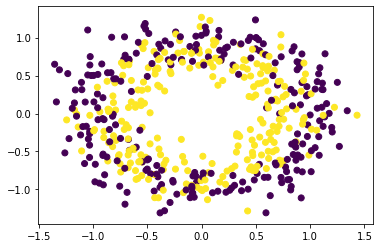

In [132]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [133]:
model = NeuralNetwork(input_size=2, layers=[10,5],output_size=2)

In [158]:
def train(X,Y,model,epochs, learning_rate,logs=True):
    training_loss=[]
    classes=2
    Y_OHT= one_hot(Y,classes)
    
    for i in range(epochs):
        Y_=model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        if(logs):
            print("Epoch %d Loss %.4f"%(i,l))
        
    return training_loss
    

In [159]:
losses= train(X,Y,model,500,0.001)

Epoch 0 Loss nan
Epoch 1 Loss nan
Epoch 2 Loss nan
Epoch 3 Loss nan
Epoch 4 Loss nan
Epoch 5 Loss nan
Epoch 6 Loss nan
Epoch 7 Loss nan
Epoch 8 Loss nan
Epoch 9 Loss nan
Epoch 10 Loss nan
Epoch 11 Loss nan
Epoch 12 Loss nan
Epoch 13 Loss nan
Epoch 14 Loss nan
Epoch 15 Loss nan
Epoch 16 Loss nan
Epoch 17 Loss nan
Epoch 18 Loss nan
Epoch 19 Loss nan
Epoch 20 Loss nan
Epoch 21 Loss nan
Epoch 22 Loss nan
Epoch 23 Loss nan
Epoch 24 Loss nan
Epoch 25 Loss nan
Epoch 26 Loss nan
Epoch 27 Loss nan
Epoch 28 Loss nan
Epoch 29 Loss nan
Epoch 30 Loss nan
Epoch 31 Loss nan
Epoch 32 Loss nan
Epoch 33 Loss nan
Epoch 34 Loss nan
Epoch 35 Loss nan
Epoch 36 Loss nan
Epoch 37 Loss nan
Epoch 38 Loss nan
Epoch 39 Loss nan
Epoch 40 Loss nan
Epoch 41 Loss nan
Epoch 42 Loss nan
Epoch 43 Loss nan
Epoch 44 Loss nan
Epoch 45 Loss nan
Epoch 46 Loss nan
Epoch 47 Loss nan
Epoch 48 Loss nan
Epoch 49 Loss nan
Epoch 50 Loss nan
Epoch 51 Loss nan
Epoch 52 Loss nan
Epoch 53 Loss nan
Epoch 54 Loss nan
Epoch 55 Loss nan
Ep

Epoch 456 Loss nan
Epoch 457 Loss nan
Epoch 458 Loss nan
Epoch 459 Loss nan
Epoch 460 Loss nan
Epoch 461 Loss nan
Epoch 462 Loss nan
Epoch 463 Loss nan
Epoch 464 Loss nan
Epoch 465 Loss nan
Epoch 466 Loss nan
Epoch 467 Loss nan
Epoch 468 Loss nan
Epoch 469 Loss nan
Epoch 470 Loss nan
Epoch 471 Loss nan
Epoch 472 Loss nan
Epoch 473 Loss nan
Epoch 474 Loss nan
Epoch 475 Loss nan
Epoch 476 Loss nan
Epoch 477 Loss nan
Epoch 478 Loss nan
Epoch 479 Loss nan
Epoch 480 Loss nan
Epoch 481 Loss nan
Epoch 482 Loss nan
Epoch 483 Loss nan
Epoch 484 Loss nan
Epoch 485 Loss nan
Epoch 486 Loss nan
Epoch 487 Loss nan
Epoch 488 Loss nan
Epoch 489 Loss nan
Epoch 490 Loss nan
Epoch 491 Loss nan
Epoch 492 Loss nan
Epoch 493 Loss nan
Epoch 494 Loss nan
Epoch 495 Loss nan
Epoch 496 Loss nan
Epoch 497 Loss nan
Epoch 498 Loss nan
Epoch 499 Loss nan
